In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Import Tables

a) Import table "sales.xlsx"

In [2]:
sales = pd.read_excel('sales.xlsx')
#sales.set_index('CustomerID', inplace = True)
sales

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
0,11054,2021-03-18 00:00:00,85.0,7230.0,1820,3435.0,1600.0,440.0,57.0,1,13,4,13,6,0
1,17117,2021-03-01 00:00:00,96.0,5850.0,320,2745.0,500.0,320.0,8.0,3,9,7,9,6,0
2,31751,2021-11-01 00:00:00,7.0,8380.0,0,1560.0,0.0,0.0,28.0,3,9,5,3,9,0
3,12947,2022-05-19 00:00:00,54.0,5090.0,280,2355.0,140.0,560.0,78.0,3,7,5,11,3,0
4,11402,2021-01-01 00:00:00,64.0,330.0,0,240.0,0.0,0.0,7.0,2,4,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,23699,2021-11-27 00:00:00,54.0,290.0,20,180.0,0.0,40.0,4.0,2,4,1,4,7,0
7004,23255,2021-03-25 00:00:00,27.0,230.0,80,525.0,20.0,80.0,23.0,3,5,1,3,8,0
7005,5798,2022-04-12 00:00:00,36.0,3050.0,2460,3840.0,1800.0,980.0,107.0,1,8,4,13,4,0
7006,16577,2020-09-01 00:00:00,49.0,20.0,200,90.0,160.0,0.0,14.0,1,3,2,2,8,1


b) Import table "crm.xlsx"

In [3]:
crm = pd.read_csv('crm.csv')
crm.set_index('CustomerID', inplace = True)
crm

,Name,Birthyear,Education,Marital_Status,Income,Kid_Younger6,Children_6to18
CustomerID,,,,,,,
14594,Miss Leah Lewis,1981,Graduation,Single,113947.0,0,0
19070,Miss Grace Black,1974,Graduation,Together,114297.0,0,0
29888,Mr. Gavin Morrison,1960,PhD,Together,115476.0,0,0
12221,Mr. Ryan Glover,1980,Graduation,Married,101172.0,1,1
21107,Mr. Paul Anderson,1971,HighSchool,Single,123128.0,0,0
...,...,...,...,...,...,...,...
30686,Mr. John Hughes,1994,PhD,Divorced,98968.0,0,0
17210,Mr. Brandon Simpson,1985,Graduation,Divorced,109977.0,0,0
29186,Mr. Thomas Churchill,1967,PhD,Together,56039.0,0,1


c) Import table "mkt.xlsx"

In [4]:
mkt = pd.read_csv('mkt.csv')
mkt[mkt.duplicated(subset= 'CustomerID', keep=False)]
mkt

,CustomerID,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
0,31958,0,0,0,0,0
1,5387,0,0,0,0,0
2,32006,0,0,0,0,0
3,7511,0,0,0,0,0
4,12308,0,0,0,0,0
...,...,...,...,...,...,...
7018,22358,0,0,0,0,0
7019,29516,0,0,0,0,0
7020,18890,0,0,0,0,0
7021,30206,0,0,0,0,0


# 1. Basic Data Exploration

## 1.1. Table - "Sales"

d) Basic dataframe exploration

In [5]:
#sales.shape

In [6]:
#sales.columns

In [7]:
#sales.head(5)

In [8]:
#sales.tail(5)

In [9]:
#sales.info()

Variables Types:

- 6 float variables
- 8 integer variables
- 1 object variable

e) Dataframe Summary

In [10]:
#sales.describe()

- `count` we can see that the variable 'Recency' and 'MntDrinks' don't have the 7008 rows filled, this means we have a problem with NA's.
- Close relationship between Drinks, desserts and entries (Verysimilar location statistics)

f) Skewness

In [11]:
#sales.skew()

- `Moderate skewness` : NumAppPurchases  and NumStorePurchases
- `High skewness` : MntMeat&Fish, MntEntries, MntVegan&Vegetarian,MntDrinks,MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth and   Complain

g) Kurtosis - (SIGNIFICADO!!!)

In [12]:
#sales.kurt()

`high Kurtosis (>3): `
 - MntEntries                
 - MntVegan&Vegetarian      
 - MntDrinks                 
 - MntDesserts               
 - MntAdditionalRequests    
 - NumOfferPurchases 
 - NumTakeAwayPurchases
 - NumAppVisitsMonth         
 - Complain  

### 1.1.1. Visual Exploration 

h) Histograms

Text(0.5, 1.0, 'NumAppVisitsMonth')

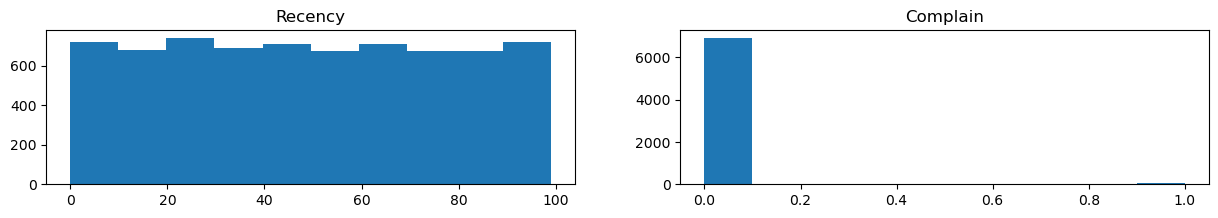

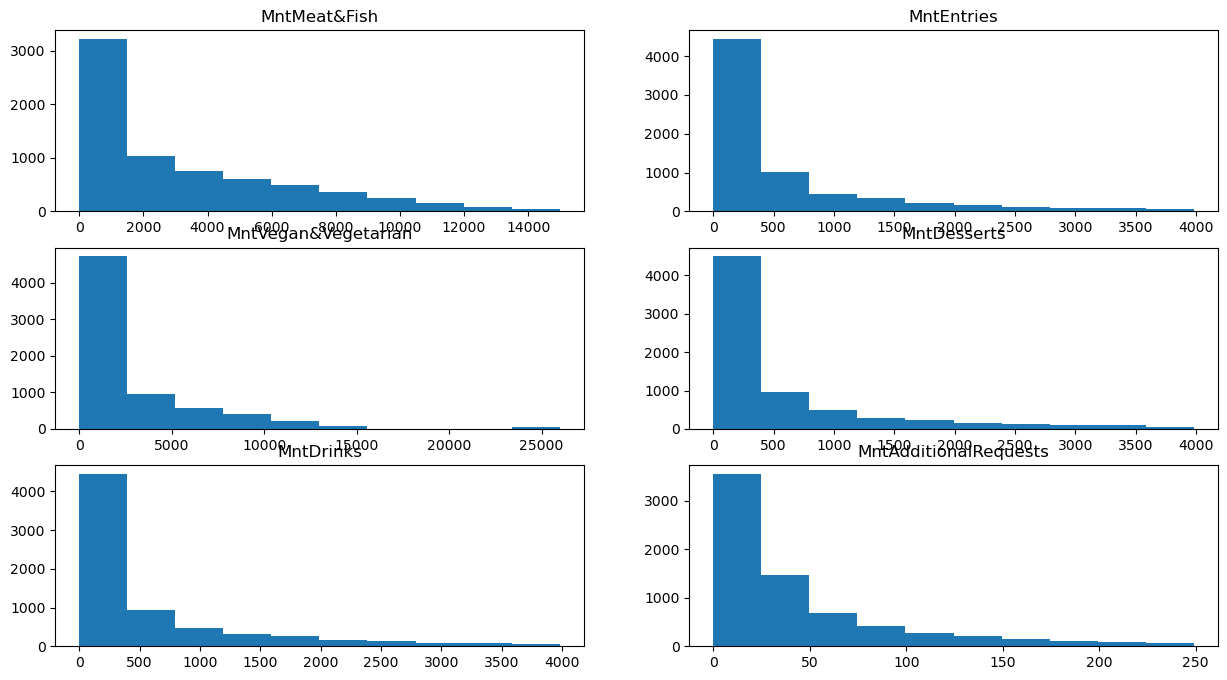

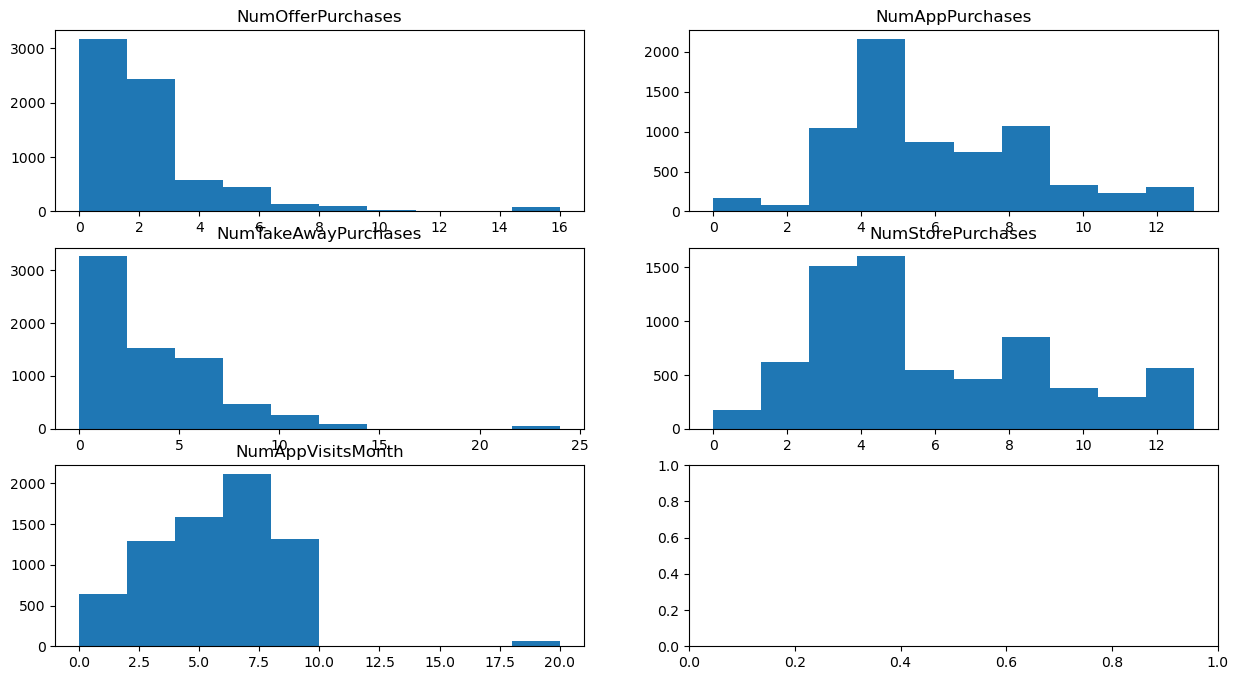

In [13]:
fig, [ax6,ax7] = plt.subplots(nrows=1, ncols = 2, figsize=(15,2)) 
ax6.hist(sales['Recency'])
ax7.hist(sales['Complain'])

fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.hist(sales['MntMeat&Fish'])
ax1.hist(sales['MntEntries'])
ax2.hist(sales['MntVegan&Vegetarian'])
ax3.hist(sales['MntDesserts'])
ax4.hist(sales['MntDrinks'])
ax5.hist(sales['MntAdditionalRequests'])

fig, [[ax8,ax9],[ax10,ax11],[ax12,ax13]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8))
ax8.hist(sales['NumOfferPurchases'])            
ax9.hist(sales['NumAppPurchases'])          
ax10.hist(sales['NumTakeAwayPurchases'])   
ax11.hist(sales['NumStorePurchases'])        
ax12.hist(sales['NumAppVisitsMonth'])   

#TITULOS E LABELS
ax6.set_title ('Recency')
ax7.set_title ('Complain')
ax0.set_title('MntMeat&Fish')
ax1.set_title('MntEntries')
ax2.set_title('MntVegan&Vegetarian')
ax3.set_title('MntDesserts')
ax4.set_title('MntDrinks')
ax5.set_title('MntAdditionalRequests')
ax8.set_title('NumOfferPurchases')            
ax9.set_title('NumAppPurchases')          
ax10.set_title('NumTakeAwayPurchases')   
ax11.set_title('NumStorePurchases')        
ax12.set_title('NumAppVisitsMonth')

i) Correlograma

<AxesSubplot:>

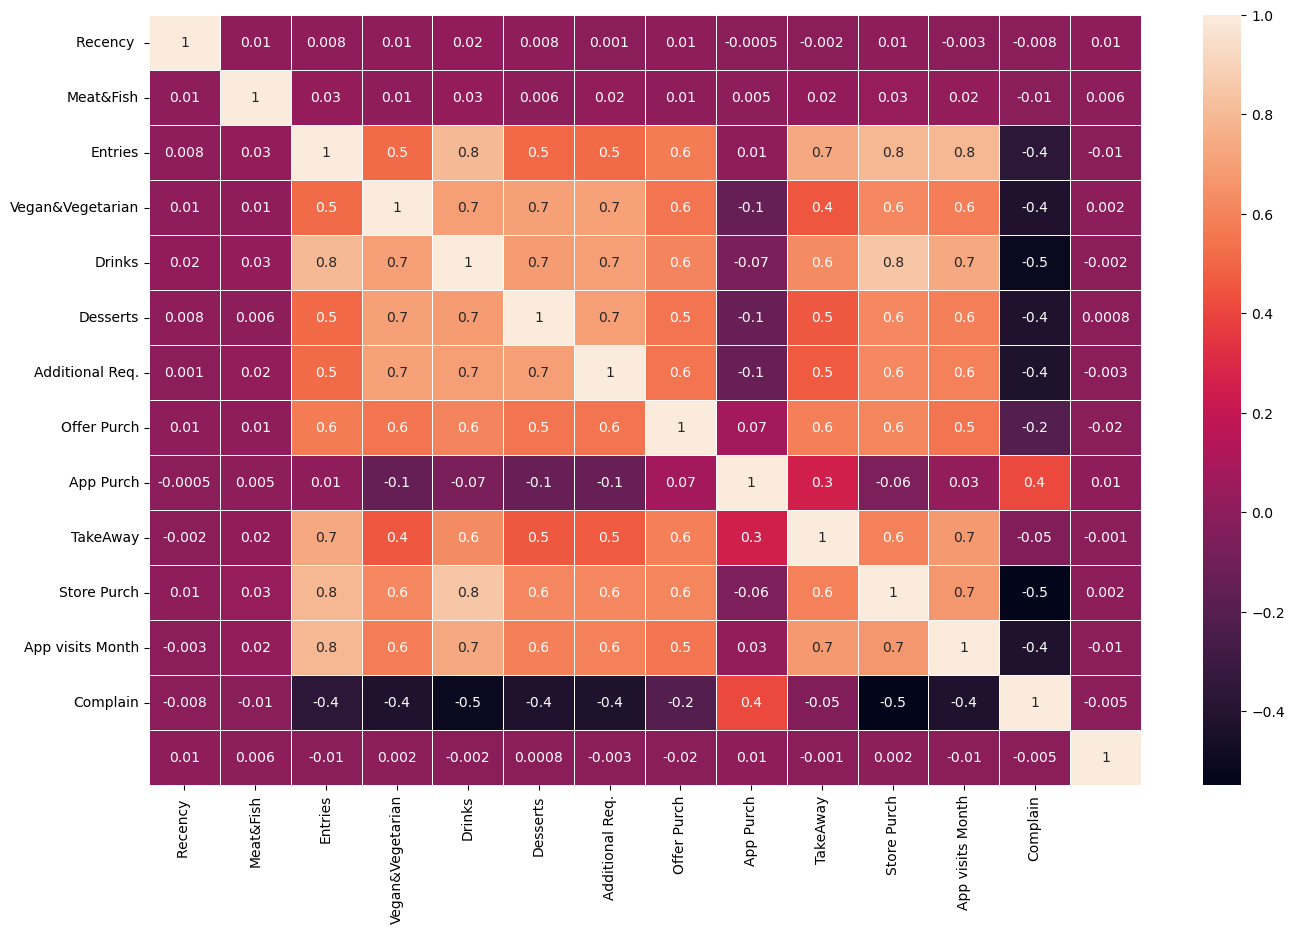

In [14]:
sales_corr = sales.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))


x_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for x-axis
y_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for y-axis

sns.heatmap(sales_corr, annot=True, fmt = '.1g', 
            xticklabels=x_axis_labels,yticklabels=y_axis_labels,
           linewidth=0.5)

 - Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated.
 - Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated
 - Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
 - Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.

 - `Recency`: has a low correlation with all of the variables
 - `Offer Purchases`: has a low correlation with all of the variables
 - `Complain`:has a low correlation with all of the variables
 - the rest of the variables atre all moderately correlated between each other.

# 2. Data Cleaning & Pre-Processing & Initial Data Transformation

## 2.1. Table - "Sales"

j) Check for duplicates (and drop)

In [15]:
#sales [sales.duplicated()]
sales.drop_duplicates(inplace= True)

k) Check for NAs & Fill NAs

In [16]:
#sales.isna().sum()

## Input "Recency" with the mean
sales.fillna({'Recency': sales['Recency'].mean()}, inplace = True)
#Turn "Recency" into integer
sales['Recency']= np.round(sales['Recency']).astype(int)

## Inpute "MntDrinks" using KNNInputer
#we are using this variables to inpute values because they have a correlation > 0.7
sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']]

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

sales['MntDrinks'] = sales_products['MntDrinks'].values

l) check if there is negative values in the variables 

In [17]:
(sales [['Recency','Complain','MntMeat&Fish','MntEntries','MntVegan&Vegetarian',
      'MntDesserts','MntDrinks', 'MntAdditionalRequests','NumOfferPurchases','NumAppPurchases','NumTakeAwayPurchases',
      'NumStorePurchases', 'NumAppVisitsMonth']] < 0).sum()

Recency                  0
Complain                 0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDesserts              0
MntDrinks                0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
dtype: int64

m) check if `Recency = 99.0` is code for something

In [18]:
(sales [['Recency']] == 99).sum()

Recency    59
dtype: int64

In [19]:
sales_R99 =sales[sales["Recency"] == 99 ]
sales_R99

#Recency=99 doesn't seem a code 

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
111,30641,2022-06-27 00:00:00,99,4530.0,760,4185.0,2880.0,760.0,183.0,2,9,8,10,3,0
350,5156,2021-02-17 00:00:00,99,450.0,0,240.0,0.0,20.0,9.0,2,4,1,3,7,0
388,20438,2021-11-11 00:00:00,99,8300.0,240,4785.0,240.0,2040.0,63.0,2,7,5,10,2,0
408,14783,2022-05-26 00:00:00,99,7070.0,1140,4950.0,680.0,0.0,11.0,1,7,6,7,3,0
534,12848,2022-06-14 00:00:00,99,10.0,180,45.0,0.0,180.0,12.0,2,4,1,3,6,0
691,28967,2022-01-03 00:00:00,99,260.0,0,60.0,0.0,0.0,4.0,1,3,1,3,6,0
757,34463,2021-07-10 00:00:00,99,1638.0,1920,9390.0,480.0,480.0,24.0,1,7,9,4,2,0
765,10796,2022-02-12 00:00:00,99,550.0,0,90.0,20.0,0.0,4.0,2,3,2,3,5,0
984,17906,2022-03-31 00:00:00,99,13850.0,780,7710.0,380.0,380.0,19.0,0,9,7,7,4,0
1174,32612,2021-03-10 00:00:00,99,4710.0,1880,9495.0,2140.0,800.0,107.0,1,5,6,12,1,0


## 2.2. Demographic Table - "CRM"

### 2.2.1. Clean Data 

f) Check for duplicates (and drop)

In [20]:
#crm[crm.duplicated()]

g) Check for NAs & Fill NAs

In [21]:
#crm.isnull().sum()

## Substitute missing values with the mode
crm['Education'] = crm['Education'].fillna(crm['Education'].mode()[0])

h) Consistency accross the variables/categories

In [22]:
## Putting everything upper case
crm['Education'] = crm['Education'].str.upper()
crm['Marital_Status']=crm['Marital_Status'].str.upper()

## Change together to married 
crm['Marital_Status'] = crm['Marital_Status'].replace('TOGETHER','MARRIED')
#crm['Marital_Status'].value_counts()

### 2.2.2. Add useful variables (data transformation)

i) Add column with gender - dummy variable - easier to read

In [23]:
## Check for all unique prefixes, we extract the first 4 letters of each name

crm['First 4 Letters'] = crm['Name'].str.slice(stop=4)

# get the unique combinations of the first 5 letters
unique_combinations = crm['First 4 Letters'].unique()

# print the unique combinations
print(unique_combinations)

crm['Name'].isnull().any()

#Now, we do the encoding. If the first 4 characters contain any variation of mrs or miss, we substitute the name by 1
#if it's any variation of 'mr.' we substitute by 0

# create a copy of the 'Name' column
crm['Gender'] = crm['Name']

# replace 'Miss' or 'Mrs.' with 1 and 'Mr.' with 0 in the 'Gender' column
crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0

# convert the 'Gender' column to integer type
crm['Gender'] = crm['Gender'].astype(float).fillna(0).astype(int)

#check new column
crm['Gender']

crm = crm.drop(columns=['First 4 Letters'])

['Miss' 'Mr. ' 'Mrs.']


/var/folders/zn/8cnznvyn0zv0vsffcz5h85tc0000gn/T/ipykernel_23018/2301189711.py:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
/var/folders/zn/8cnznvyn0zv0vsffcz5h85tc0000gn/T/ipykernel_23018/2301189711.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0


j) Transform "Birthyear" into "Age"

In [24]:
## Convert the "Birthyear" to an 'Age' column
import datetime

#calculate the current year
current_year = datetime.datetime.now().year

#create a new column 'Age' by subtracting birth_year from current year
crm['Age'] = current_year - crm['Birthyear']

# drop
crm = crm.drop('Birthyear', axis=1)
crm

,Name,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age
CustomerID,,,,,,,,
14594,Miss Leah Lewis,GRADUATION,SINGLE,113947.0,0,0,1,42
19070,Miss Grace Black,GRADUATION,MARRIED,114297.0,0,0,1,49
29888,Mr. Gavin Morrison,PHD,MARRIED,115476.0,0,0,0,63
12221,Mr. Ryan Glover,GRADUATION,MARRIED,101172.0,1,1,0,43
21107,Mr. Paul Anderson,HIGHSCHOOL,SINGLE,123128.0,0,0,0,52
...,...,...,...,...,...,...,...,...
30686,Mr. John Hughes,PHD,DIVORCED,98968.0,0,0,0,29
17210,Mr. Brandon Simpson,GRADUATION,DIVORCED,109977.0,0,0,0,38
29186,Mr. Thomas Churchill,PHD,MARRIED,56039.0,0,1,0,56


In [25]:
# defining Age groups
bins = [0, 15, 25, 35, 45, 65,100] # define age groups
labels = ['<15', '15-25','25-35', '35-45', '45-65', '65+'] # define the labels for each age group, as INE does 
crm['age_group'] = pd.cut(crm['Age'], bins=bins, labels=labels) # add a new column with the age groups
crm

,Name,Education,Marital_Status,Income,Kid_Younger6,Children_6to18,Gender,Age,age_group
CustomerID,,,,,,,,,
14594,Miss Leah Lewis,GRADUATION,SINGLE,113947.0,0,0,1,42,35-45
19070,Miss Grace Black,GRADUATION,MARRIED,114297.0,0,0,1,49,45-65
29888,Mr. Gavin Morrison,PHD,MARRIED,115476.0,0,0,0,63,45-65
12221,Mr. Ryan Glover,GRADUATION,MARRIED,101172.0,1,1,0,43,35-45
21107,Mr. Paul Anderson,HIGHSCHOOL,SINGLE,123128.0,0,0,0,52,45-65
...,...,...,...,...,...,...,...,...,...
30686,Mr. John Hughes,PHD,DIVORCED,98968.0,0,0,0,29,25-35
17210,Mr. Brandon Simpson,GRADUATION,DIVORCED,109977.0,0,0,0,38,35-45
29186,Mr. Thomas Churchill,PHD,MARRIED,56039.0,0,1,0,56,45-65


## 2.3. Marketing Table - "mkt.xlsx"

### 2.3.1. Data Cleaning

k) Check for duplicates (and drop)

In [26]:
#mkt[mkt.duplicated()]

l) Check for NAs & Fill NAs

In [27]:
#mkt.isna().sum()

## 2.4. Merge all tables

In [28]:
df = pd.merge(sales, crm, on='CustomerID')

In [29]:
df= pd.merge(df, mkt, on='CustomerID')

In [30]:
df.set_index('CustomerID', inplace = True)

In [31]:
df[df.duplicated()]

,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,...,Kid_Younger6,Children_6to18,Gender,Age,age_group,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5
CustomerID,,,,,,,,,,,,,,,,,,,,,
6470,2021-06-17 00:00:00,75,5760.0,2220,13950.0,2960.0,1860.0,74.0,1,5,...,0,0,1,43,35-45,0,0,0,0,0
25685,2020-11-19 00:00:00,15,5020.0,0,645.0,0.0,0.0,27.0,9,10,...,1,1,0,68,65+,0,0,0,0,0
28739,2021-07-21 00:00:00,78,2140.0,1700,2085.0,1160.0,740.0,16.0,4,7,...,0,1,0,53,45-65,0,0,0,0,0
30464,2021-05-02 00:00:00,9,2120.0,980,2700.0,1200.0,980.0,32.0,2,5,...,0,1,1,63,45-65,0,0,0,0,0
24260,2021-05-18 00:00:00,64,3330.0,0,12225.0,1980.0,832.0,29.0,1,6,...,0,0,0,30,25-35,0,0,0,0,0
25052,2021-07-23 00:00:00,12,700.0,60,1275.0,240.0,180.0,95.0,3,6,...,1,0,0,46,45-65,0,0,0,0,0
5540,2021-03-08 00:00:00,51,1540.0,400,990.0,0.0,240.0,27.0,7,8,...,1,0,0,28,25-35,0,0,0,0,0
19295,2022-05-13 00:00:00,15,9370.0,1060,3000.0,800.0,2140.0,200.0,0,6,...,0,0,0,25,15-25,0,0,1,0,0
12320,2021-04-06 00:00:00,64,120.0,0,195.0,20.0,0.0,10.0,1,3,...,1,0,0,38,35-45,0,0,0,0,0


In [32]:
df.drop_duplicates(inplace= True)

## 2.5. Outliers

It's an important topic:
- 1st se Kustosis....
- 2st see if exists through histograms
- If less than 3% cut

- merge tables!!!! Name : df

Prespective 1 

Text(0.5, 1.0, 'MntAdditionalRequests')

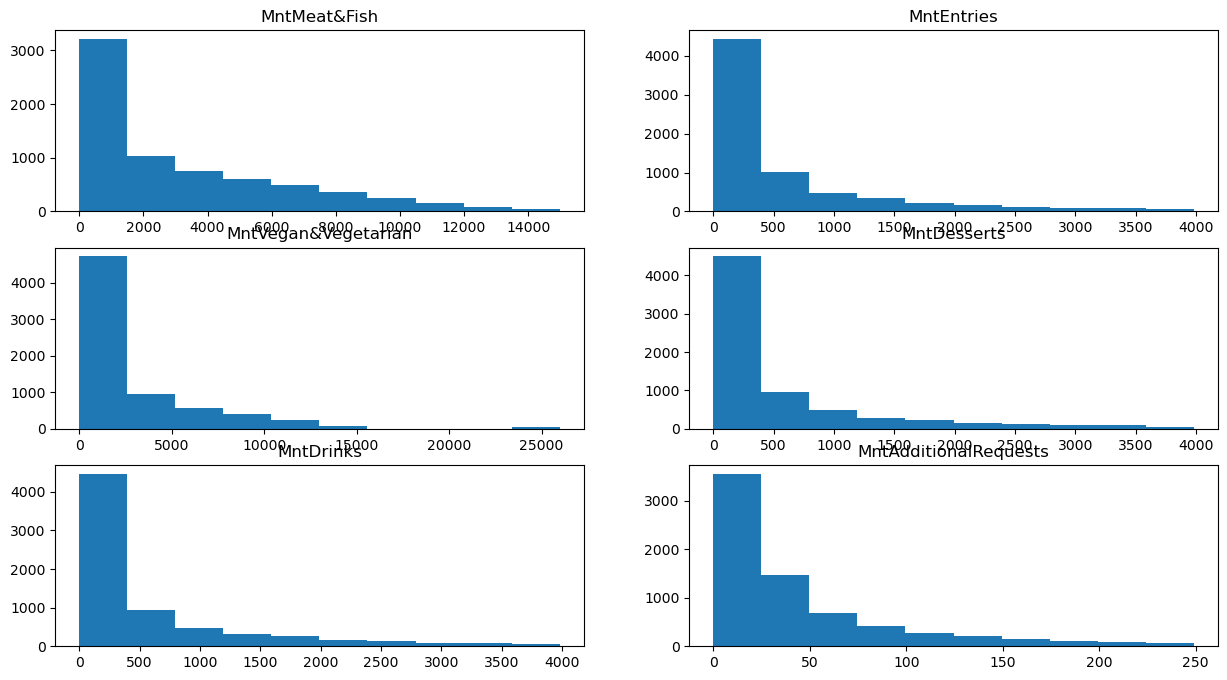

In [33]:

fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.hist(df['MntMeat&Fish'])
ax1.hist(df['MntEntries'])
ax2.hist(df['MntVegan&Vegetarian'])
ax3.hist(df['MntDesserts'])
ax4.hist(df['MntDrinks'])
ax5.hist(df['MntAdditionalRequests'])

#Titles
ax0.set_title('MntMeat&Fish')
ax1.set_title('MntEntries')
ax2.set_title('MntVegan&Vegetarian')
ax3.set_title('MntDesserts')
ax4.set_title('MntDrinks')
ax5.set_title('MntAdditionalRequests')

Prespective 2 

Text(0.5, 1.0, 'NumStorePurchases')

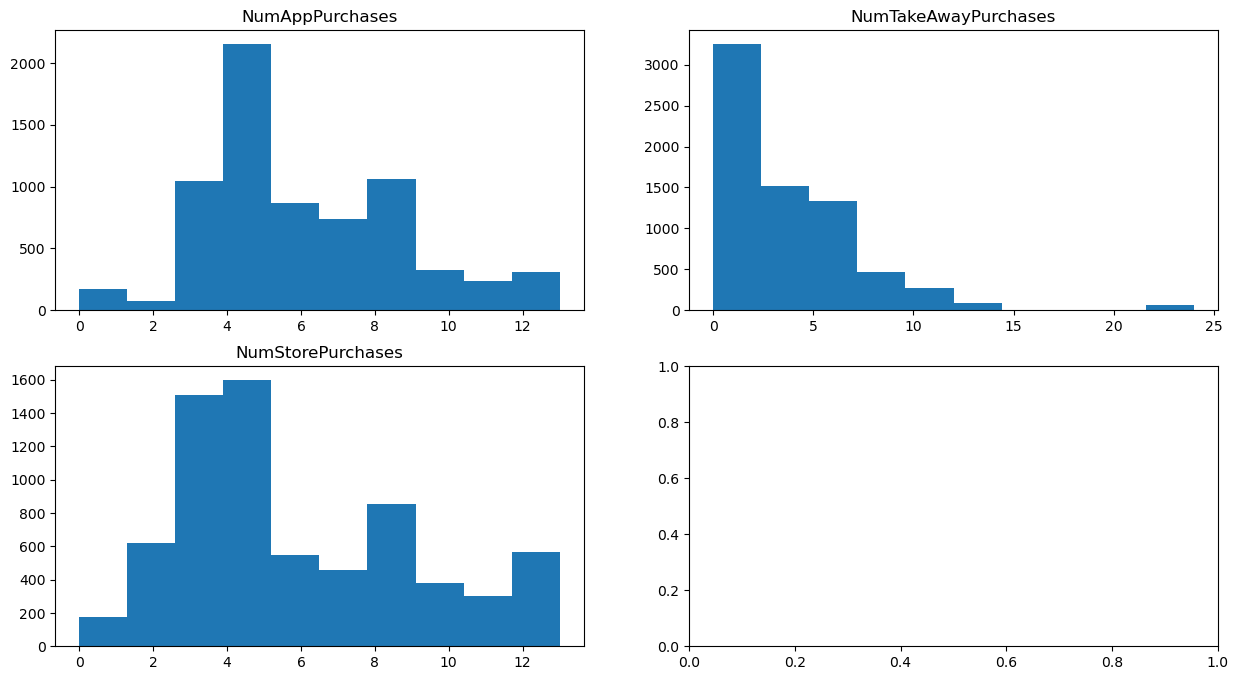

In [34]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows=2, ncols = 2, figsize=(15,8))           
ax1.hist(df['NumAppPurchases'])          
ax2.hist(df['NumTakeAwayPurchases'])   
ax3.hist(df['NumStorePurchases'])        
   
#Set the labels            
ax1.set_title('NumAppPurchases')          
ax2.set_title('NumTakeAwayPurchases')   
ax3.set_title('NumStorePurchases')        

Prespective 3

(array([ 331., 1275., 1615., 1657., 1467.,  552.,   17.,    0.,    0.,
          86.]),
 array([  2493.8   ,  26008.3925,  49522.985 ,  73037.5775,  96552.17  ,
        120066.7625, 143581.355 , 167095.9475, 190610.54  , 214125.1325,
        237639.725 ]),
 <BarContainer object of 10 artists>)

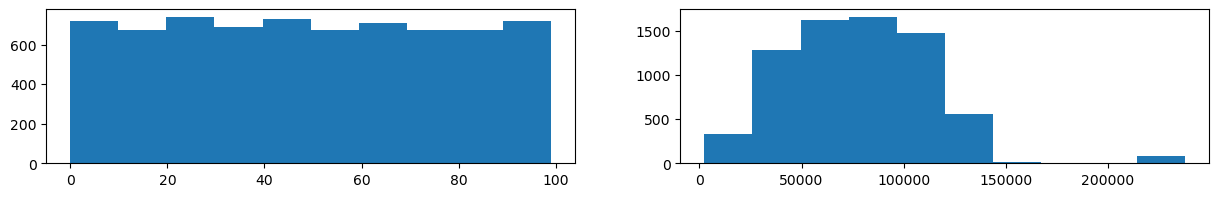

In [35]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols = 2, figsize=(15,2)) 
ax1.hist(df['Recency'])
ax2.hist(df['Income'])

#In this prespective we sumed the amount spent and number of purchases by client.
#the other variables were already treat, we removed the outliers for the other prespectives.

       
#ax1.hist(df['NumAppPurchases'])          
#ax2.hist(df['NumTakeAwayPurchases'])   
#ax3.hist(df['NumStorePurchases']) 
#ax0.hist(df['MntMeat&Fish'])
#ax1.hist(df['MntEntries'])
#ax2.hist(df['MntVegan&Vegetarian'])
#ax3.hist(df['MntDesserts'])
#ax4.hist(df['MntDrinks'])
#ax5.hist(df['MntAdditionalRequests'])

after doing the histograms we are going to take out the outliers from the variables we are using in the clustering analisys: 
- Income 
- NumTakeAwayPurchases

In [36]:
# percentage of outliers in Income 
(sum(df['Income'] > 200000)/7000)*100

1.2285714285714284

In [37]:
# percentage of outliers in umTakeAwayPurchases 
(sum(df['NumTakeAwayPurchases'] > 20)/7000)*100

0.8714285714285714

- since the percentage of outliers in these variables is <3%, we are going to drop these observartions 

In [38]:
df = df.drop(df[df['Income'] > 200000].index)

In [39]:
df = df.drop(df[df['NumTakeAwayPurchases'] > 20].index)

# 3. 1st Perspective - Consumption patterns/types

EXPLICAÇÃO DA PERSPECTIVA:
- Objetivos;
- Interesse;
- variáveis foco;

## 3.1. Dataframe Preparation

- 1- Isolar variáveis de interesse
- 2- Standardização (MinMax)
- 3- PCA???!!!

In [87]:
df_mnt_pre_normalize=(df[['MntMeat&Fish','MntEntries','MntDrinks','MntAdditionalRequests','MntDesserts','MntVegan&Vegetarian']]).copy()

In [ ]:
df_mnt_pre_normalize

In [ ]:
# MINMAX NORMALIZATION
#import pandas as pd
#from sklearn.preprocessing import MinMaxScaler

# Initialize scaler object
#scaler = MinMaxScaler()

# Apply scaler to the data in the data frame
#df_mnt = pd.DataFrame(scaler.fit_transform(df_mnt_pre_normalize), columns=df_mnt_pre_normalize.columns)

# View the normalized data frame
#df_mnt.head()

In [90]:
# create a new DataFrame with the columns you want to standardize
cols_to_standardize = ['MntMeat&Fish','MntEntries','MntDrinks','MntAdditionalRequests','MntDesserts','MntVegan&Vegetarian']
data_to_standardize = df_mnt_pre_normalize[cols_to_standardize]

# standardize the data
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# create a new DataFrame with standardized data and column names
standardized_df = pd.DataFrame(data=standardized_data, columns=cols_to_standardize, index=df_mnt_pre_normalize.index)

# merge back into the original DataFrame
df_mnt = pd.merge(df_mnt_pre_normalize.drop(cols_to_standardize, axis=1), standardized_df, left_index=True, right_index=True)
df_mnt

,MntMeat&Fish,MntEntries,MntDrinks,MntAdditionalRequests,MntDesserts,MntVegan&Vegetarian
CustomerID,,,,,,
11054,0.482644,0.457286,0.402010,0.228916,0.110553,0.229229
17117,0.390521,0.080402,0.125628,0.032129,0.080402,0.183183
31751,0.559413,0.000000,0.000000,0.112450,0.000000,0.104104
12947,0.339786,0.070352,0.035176,0.313253,0.140704,0.157157
11402,0.022029,0.000000,0.000000,0.028112,0.000000,0.016016
...,...,...,...,...,...,...
23699,0.019359,0.005025,0.000000,0.016064,0.010050,0.012012
23255,0.015354,0.020101,0.005025,0.092369,0.020101,0.035035
5798,0.203605,0.618090,0.452261,0.429719,0.246231,0.256256


## 3.2. PCA

In [94]:
df_pca= df_mnt.copy()

In [96]:
from sklearn.decomposition import PCA

### 3.2.1 Choosing the number of Components

In [98]:
pca = PCA(n_components=6)
pca.fit_transform(df_pca)

array([[ 3.82070170e-01,  2.32883927e-02, -4.61680006e-02,
         1.58215723e-01, -1.88063797e-01, -2.12203688e-01],
       [-1.19343599e-02,  1.69148523e-01, -1.60133519e-01,
         3.62949984e-02,  1.59278901e-02, -6.15724372e-02],
       [-6.86615449e-02,  4.02321992e-01, -7.80001643e-02,
        -2.67156117e-04,  6.10865856e-03, -1.26178383e-01],
       ...,
       [ 4.76523870e-01, -2.86648617e-01,  1.63052748e-01,
         8.41263725e-02, -2.39692689e-01, -1.18415646e-01],
       [-3.36595283e-01, -7.97740816e-02, -4.53260826e-03,
         2.17690804e-02, -2.79985977e-02,  4.68305712e-03],
       [-2.80081447e-01, -1.18467379e-01, -1.64423442e-02,
         1.09993327e-01,  4.11400737e-02, -2.44485021e-02]])

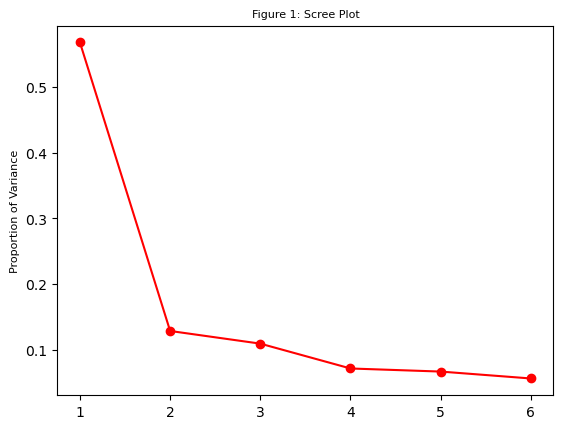

In [101]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

- Considering the elbow rule, the 2 first components should be retain 

### 3.2.2. PCA for 2 components 

In [102]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_pca)

In [103]:
pca2_res = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
 
pca2_res.head(6)

,PC1,PC2
0,0.382070,0.023288
1,-0.011934,0.169149
2,-0.068662,0.402322
3,0.024515,0.177208
4,-0.367388,-0.033330
5,-0.007227,-0.170350


#### 3.2.2.1. Biplot

In [104]:
def biplot(score,coef,labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5, 
                color='orange')
 
    for i in range(n): 
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkblue', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 

    plt.figure()

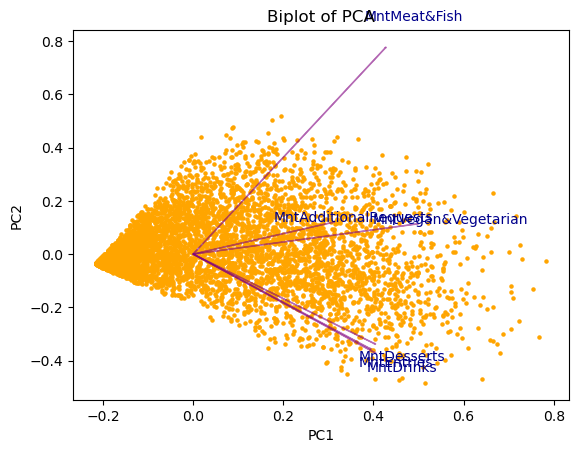

<Figure size 640x480 with 0 Axes>

In [106]:
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       list(df_pca.columns))

## 3.3. K-means

In [91]:
from sklearn.cluster import KMeans

In [ ]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt)
    inertias.append(model.inertia_)

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
df_mnt.corr()

In [ ]:
df_mnt_k3 = df_mnt.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_mnt)

In [ ]:
model_k3

In [ ]:
df_mnt_k3['k3 cluster'] = model_k3.labels_

In [ ]:
df_mnt_k3.groupby(['k3 cluster']).mean().transpose()

In [ ]:
descr3 = df_mnt_k3.groupby(['k3 cluster']).describe().transpose()
descr3

In [ ]:
df_mnt_k2 = df_mnt.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(df_mnt)

In [ ]:
f_mnt_k2['k2'] = model_k2.labels_

In [ ]:
df_mnt_k2.groupby(['k2']).mean().transpose()

In [ ]:
descr2 = df_mnt_k2.groupby(['k2']).describe().transpose()
descr2

Visualization 

In [92]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntEntries'], df_mnt_k2['MntMeat&Fish'], c=df_mnt_k2['k2'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

NameError: name 'df_mnt_k2' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt['MntEntries'], df_mnt['MntMeat&Fish'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntDrinks'], df_mnt_k2['MntEntries'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a list to store silhouette scores for different values of k
silhouette_scores = []

# Fit k-means clustering for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_mnt)
    score = silhouette_score(df_mnt, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
df_mnt_k4 = df_mnt.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [ ]:
df_mnt_k4['k4'] = model_k4.labels_

In [ ]:
df_mnt_k4.groupby(['k4']).mean().transpose()

In [ ]:
descr4 = df_mnt_k4.groupby(['k4']).describe().transpose()
descr4

In [ ]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()


In [ ]:
df_mnt.corr()

#Let's try interpret MntEntries, MntDrinks and MntDesserts as supplements

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMaxScaler to your dataframe
df_mnt_scaled = scaler.fit_transform(df_mnt)

# The df_mnt_scaled is now a numpy array with the same shape as your original dataframe

import pandas as pd

# Transform numpy array into dataframe
df_mnt_scaled = pd.DataFrame(df_mnt_scaled, columns=df_mnt.columns)

In [ ]:
df_mnt_scaled

In [ ]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt_scaled)
    inertias.append(model.inertia_)

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
df_k4 = df_mnt_scaled.copy()
k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [ ]:
df_k4['k4_c'] = k4.labels_

In [ ]:
d4 = df_k4.groupby(['k4_c']).describe().transpose()
d4

In [ ]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_k4[x_var], df_k4[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()

## 3.3. DBSCAN

## 3.4. Cluster analysis & caracterization

## 3.5. Business & Marketing insights

# 4. 2nd Perspective - Preference in the means of purchase

EXPLICAÇÃO DA PERSPECTIVA:

 - Objetivos;
 - Interesse;
 - variáveis foco;

## 4.1. Dataframe Preparation

## 4.2. K-means

## 4.3. DBSCAN

## 4.4. Fuzzy K-means (?)

## 4.5. Cluster analysis & caracterization

## 4.6. Business & Marketing insights

# 5. 3rd Perspective - Consumer value

EXPLICAÇÃO DA PERSPECTIVA:

- Objetivos;
- Interesse;
- variáveis foco;

## 5.1. Dataframe Preparation

### 5.1.1. Creating the Dataframe

In [40]:
cstm_value = df [[ 'Recency', 'MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases','Income',]].copy()

### 5.1.2 Creating the variables for total spent and purchases

In [41]:
#Total amount spent by costumer 
cstm_value = cstm_value.assign(t_Mnt = cstm_value['MntMeat&Fish'] + cstm_value['MntEntries'] + cstm_value['MntVegan&Vegetarian']
                              +cstm_value['MntDrinks']+cstm_value['MntDesserts']+cstm_value['MntAdditionalRequests'])

#Total of purchases by costumer 
cstm_value = cstm_value.assign(t_Num =  cstm_value['NumAppPurchases'] 
                              +cstm_value['NumTakeAwayPurchases']+cstm_value['NumStorePurchases'])

#drop of the columns 
cstm_value = cstm_value.drop(columns=['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian',                              
                                      'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumAppPurchases',                                    
                                      'NumTakeAwayPurchases', 'NumStorePurchases', 'NumOfferPurchases'])
cstm_value

,Recency,Income,t_Mnt,t_Num
CustomerID,,,,
11054,85,107153.0,14582.0,30
17117,96,96725.0,9743.0,25
31751,7,84836.0,9968.0,17
12947,54,100682.0,8503.0,23
11402,64,65350.0,577.0,8
...,...,...,...,...
23699,54,38970.0,534.0,9
23255,27,55552.0,958.0,9
5798,36,97461.0,12237.0,25


### 5.1.3 Standardization

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# create a new DataFrame with the columns you want to standardize
cols_to_standardize = ['Recency', 'Income', 't_Mnt', 't_Num']
data_to_standardize = cstm_value[cols_to_standardize]

# standardize the data
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# create a new DataFrame with standardized data and column names
standardized_df = pd.DataFrame(data=standardized_data, columns=cols_to_standardize, index=cstm_value.index)

# merge back into the original DataFrame
cstm_v_std = pd.merge(cstm_value.drop(cols_to_standardize, axis=1), standardized_df, left_index=True, right_index=True)

In [44]:
cstm_v_std

,Recency,Income,t_Mnt,t_Num
CustomerID,,,,
11054,0.858586,0.691103,0.438193,0.833333
17117,0.969697,0.621905,0.292612,0.694444
31751,0.070707,0.543012,0.299381,0.472222
12947,0.545455,0.648163,0.255307,0.638889
11402,0.646465,0.413707,0.016854,0.222222
...,...,...,...,...
23699,0.545455,0.238654,0.015560,0.250000
23255,0.272727,0.348689,0.028316,0.250000
5798,0.363636,0.626789,0.367644,0.694444


## 5.2. K-means

In [45]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=100).fit(cstm_v_std)
    inertias.append(model.inertia_)

/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anacon

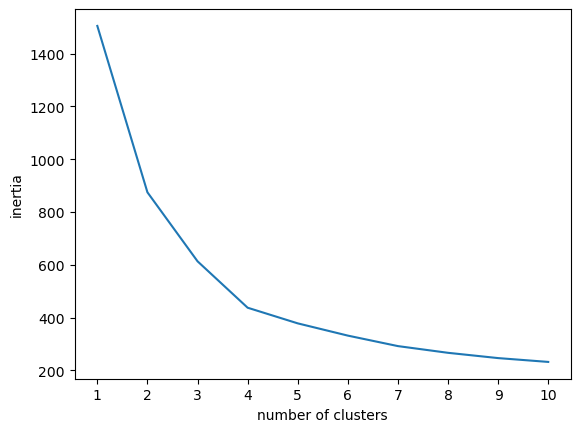

In [46]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anacon

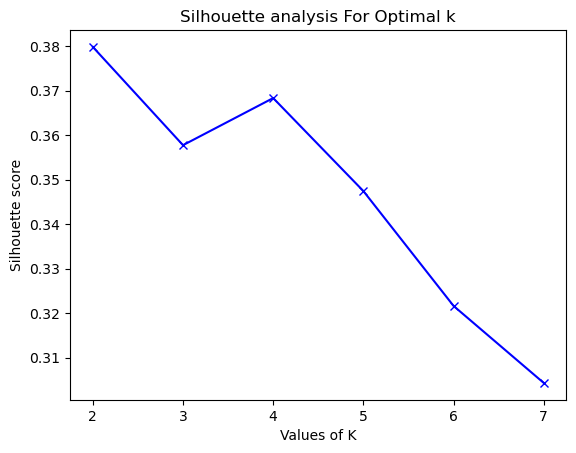

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(cstm_v_std)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(cstm_v_std, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

- We can see an elbow in the number of 4 clusters
- We are going to do clustering for K = 3,4,5

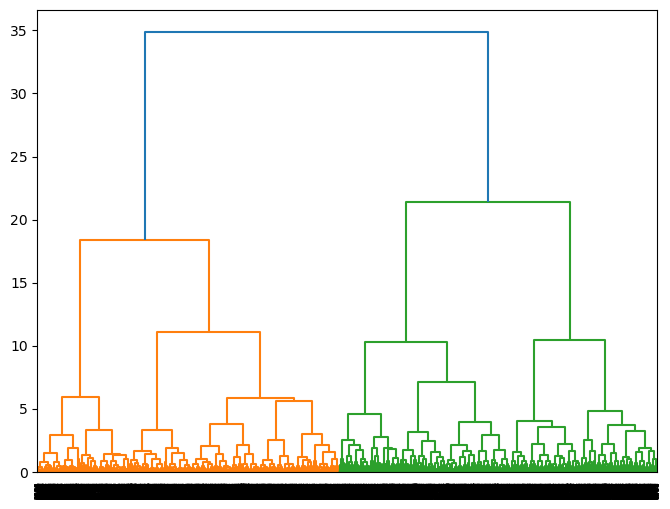

In [48]:
  from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
sales_vc_sample = cstm_v_std.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(cstm_v_std , method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

### 4 Clusters (K=4)

In [49]:
cstm_v_k4 = cstm_v_std.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(cstm_v_k4)

/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
cstm_v_k4['k_label'] = model_k4.labels_

## 5.3. Cluster analysis & caracterization

In [51]:
cstm_v_k4.groupby(['k_label']).mean().transpose()

k_label,0,1,2,3
Recency,0.254448,0.245853,0.754008,0.754815
Income,0.329357,0.662639,0.672616,0.338301
t_Mnt,0.048416,0.411439,0.440522,0.053540
t_Num,0.275463,0.613120,0.626066,0.284362


- Cluster 0 and 2 for recency, are the consumers who consumed the least time
- Income: cluster 1 and 2 are the ones that have a salary much higher than the average, almost twice as much as the other clusters
- t_Mnt: cluster 1 and 2 spend more 
- t_Num: cluster 1 and 2 buy more in number  
- Cluster 1 represents the most regular and the most valauble costumers, since it has a lower recency and these clients consume more than the cluster 0 and 3.
- Cluster 2 has a higher recency but is the one with higher consumption considering the other clusters (very close to cluster 1)


In [52]:
cstm_v_k4.groupby(['k_label']).describe().transpose()

k_label                  0            1            2            3
Recency count  1944.000000  1576.000000  1577.000000  1793.000000
        mean      0.254448     0.245853     0.754008     0.754815
        std       0.149435     0.145890     0.147579     0.144159
        min       0.000000     0.000000     0.474747     0.505051
        25%       0.121212     0.121212     0.626263     0.636364
        50%       0.252525     0.247475     0.747475     0.757576
        75%       0.383838     0.373737     0.878788     0.878788
        max       0.505051     0.515152     1.000000     1.000000
Income  count  1944.000000  1576.000000  1577.000000  1793.000000
        mean      0.329357     0.662639     0.672616     0.338301
        std       0.126281     0.111550     0.110840     0.129817
        min       0.000000     0.323805     0.315291     0.003136
        25%       0.238035     0.581145     0.589987     0.243452
        50%       0.330142     0.658475     0.674182     0.344648
        75%       0.424347     0.743748     0.754628     0.436720
        max       0.652954     0.982541     1.000000     0.693406
t_Mnt   count  1944.000000  1576.000000  1577.000000  1793.000000
        mean      0.048416     0.411439     0.440522     0.053540
        std       0.049499     0.175024     0.180164     0.053929
        min       0.000000     0.103558     0.125099     0.000202
        25%       0.013507     0.272117     0.288942     0.014266
        50%       0.025819     0.386853     0.420774     0.029008
        75%       0.073541     0.528381     0.566777     0.080844
        max       0.294658     0.981979     1.000000     0.357084
t_Num   count  1944.000000  1576.000000  1577.000000  1793.000000
        mean      0.275463     0.613120     0.626066     0.284362
        std       0.099808     0.113268     0.110311     0.107327
        min       0.000000     0.333333     0.333333     0.000000
        25%       0.194444     0.527778     0.555556     0.194444
        50%       0.250000     0.611111     0.611111     0.250000
        75%       0.333333     0.694444     0.694444     0.361111
        max       0.583333     1.000000     1.000000     0.611111

#### Visualitation 

histgram

In [53]:
cluster0 = cstm_v_k4[cstm_v_k4.k_label==0]
cluster1 = cstm_v_k4[cstm_v_k4.k_label==1]
cluster2 = cstm_v_k4[cstm_v_k4.k_label==2]
cluster3 = cstm_v_k4[cstm_v_k4.k_label==3]

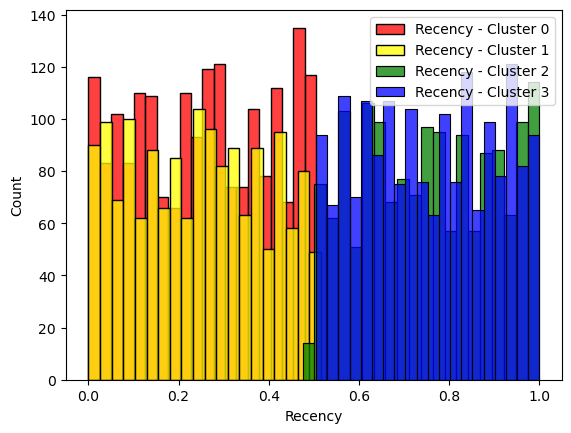

In [54]:
sns.histplot(cluster0['Recency'],color='red',label='Recency - Cluster 0', bins = 20)
sns.histplot(cluster1['Recency'],color='yellow',label='Recency - Cluster 1', bins = 20)
sns.histplot(cluster2['Recency'],color='green',label='Recency - Cluster 2', bins = 20)
sns.histplot(cluster3['Recency'],color='blue',label='Recency - Cluster 3', bins = 20)
plt.legend()

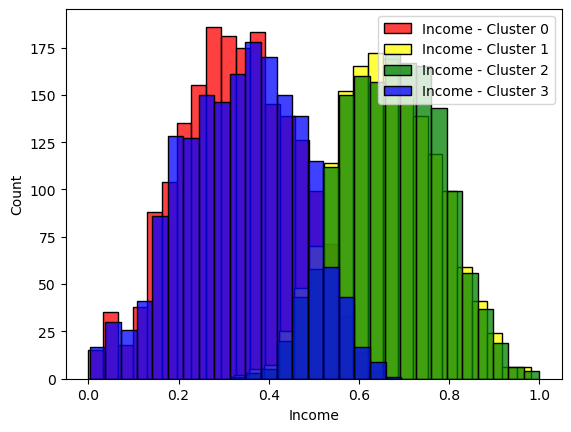

In [55]:
sns.histplot(cluster0['Income'],color='red',label='Income - Cluster 0', bins = 20)
sns.histplot(cluster1['Income'],color='yellow',label='Income - Cluster 1', bins = 20)
sns.histplot(cluster2['Income'],color='green',label='Income - Cluster 2', bins = 20)
sns.histplot(cluster3['Income'],color='blue',label='Income - Cluster 3', bins = 20)
plt.legend()

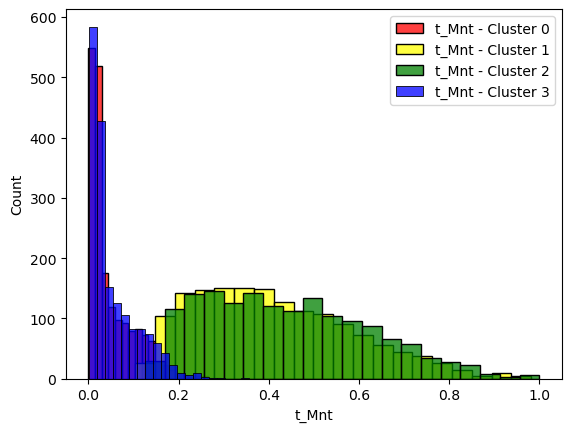

In [56]:
sns.histplot(cluster0['t_Mnt'],color='red',label='t_Mnt - Cluster 0', bins = 20)
sns.histplot(cluster1['t_Mnt'],color='yellow',label='t_Mnt - Cluster 1', bins = 20)
sns.histplot(cluster2['t_Mnt'],color='green',label='t_Mnt - Cluster 2', bins = 20)
sns.histplot(cluster3['t_Mnt'],color='blue',label='t_Mnt - Cluster 3', bins = 20)
plt.legend()

Scatterplot 

In [57]:
centroids = model_k4.cluster_centers_
centroids

array([[0.25457661, 0.32941287, 0.04839683, 0.27542131],
       [0.24569505, 0.66263129, 0.41142545, 0.61301587],
       [0.75367251, 0.67278052, 0.4408517 , 0.62632191],
       [0.75510399, 0.33847403, 0.05370173, 0.28465255]])

In [58]:
centroid_0_Rnc = centroids[0,0]
centroid_1_Rnc = centroids[1,0]
centroid_2_Rnc = centroids[2,0]
centroid_3_Rnc = centroids[3,0]
centroid_0_Inc = centroids[0,1]
centroid_1_Inc = centroids[1,1]
centroid_2_Inc = centroids[2,1]
centroid_3_Inc = centroids[3,1]
centroid_0_Mnt = centroids[0,2]
centroid_1_Mnt = centroids[1,2]
centroid_2_Mnt = centroids[2,2]
centroid_3_Mnt = centroids[3,2]
centroid_0_Num = centroids[0,3]
centroid_1_Num = centroids[1,3]
centroid_2_Num = centroids[2,3]
centroid_3_Num = centroids[3,3]

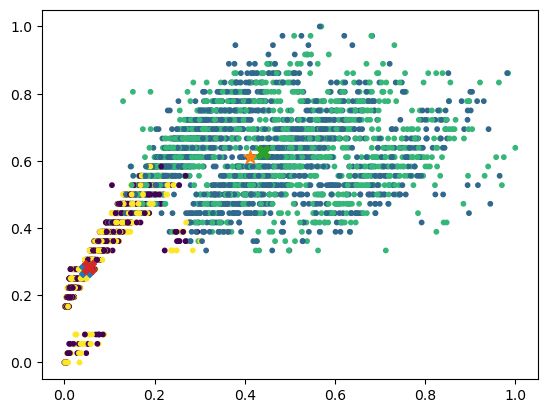

In [59]:
plt.scatter(cstm_v_k4.t_Mnt, cstm_v_k4.t_Num,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Mnt, centroid_0_Num, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Mnt, centroid_1_Num, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Mnt, centroid_2_Num, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Mnt, centroid_3_Num, marker='X', s=100)#VERMELHO ->

plt.show()

- roxo e amarelo são os cluster 0 e 3 pois são so que gastam menos e consomem menos vezes  -> são os que são menos valiosos e os que apresentam um padrão de consumo mais parecido entre eles (obs menos dispersão)
- azul e verde são os cluster 1 e 2 são os que gastam e consomem mais
- 

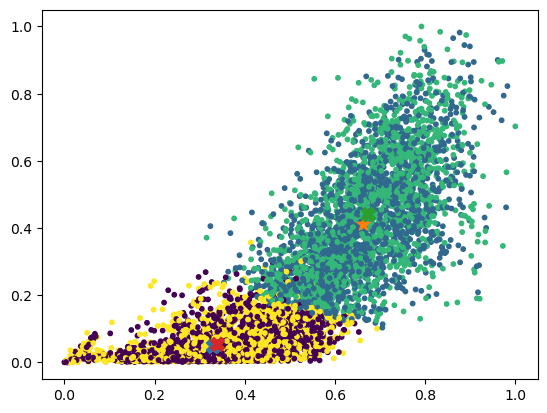

In [60]:
plt.scatter(cstm_v_k4.Income, cstm_v_k4.t_Mnt,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Inc, centroid_0_Mnt, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Inc, centroid_1_Mnt, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Inc, centroid_2_Mnt, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Inc, centroid_3_Mnt, marker='X', s=100)#VERMELHO ->

plt.show()

- roxo e amarelo representa o cluster 0 e 3, são os que gastam menos e rebem menos 
- azul e verde é o cluster 1 e 2, que tem um income superior e gastam mais 
- os centroids parecem todos centrados 

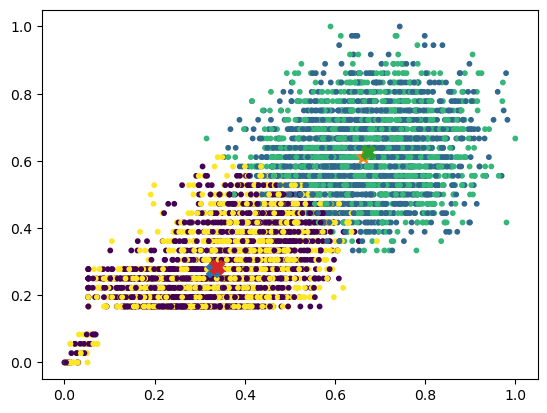

In [61]:
plt.scatter(cstm_v_k4.Income, cstm_v_k4.t_Num,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Inc, centroid_0_Num, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Inc, centroid_1_Num, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Inc, centroid_2_Num, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Inc, centroid_3_Num, marker='X', s=100)#VERMELHO ->

plt.show()

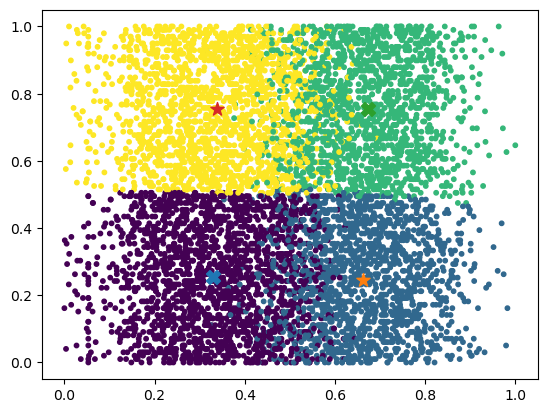

In [62]:
plt.scatter(cstm_v_k4.Income, cstm_v_k4.Recency,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Inc, centroid_0_Rnc, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Inc, centroid_1_Rnc, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Inc, centroid_2_Rnc, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Inc, centroid_3_Rnc, marker='*', s=100)#VERMELHO ->

plt.show()

- azul cluster 1
- verde cluster 2 
- amarelo cluster 3 
- roxo culter 0 

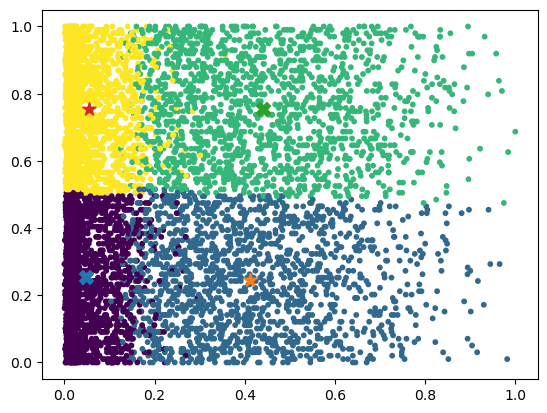

In [63]:
plt.scatter(cstm_v_k4.t_Mnt, cstm_v_k4.Recency,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Mnt, centroid_0_Rnc, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Mnt, centroid_1_Rnc, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Mnt, centroid_2_Rnc, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Mnt, centroid_3_Rnc, marker='*', s=100)#VERMELHO ->

plt.show()

- amarelo gasta menos mas tem um recency menor 
- azul tem um income maior e um recency menor, vai la mais vezes 

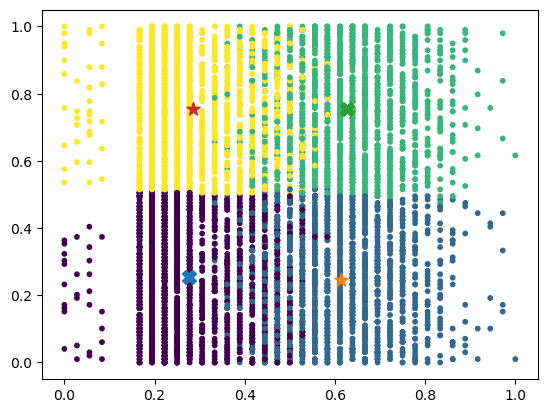

In [64]:
plt.scatter(cstm_v_k4.t_Num, cstm_v_k4.Recency,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Num, centroid_0_Rnc, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Num, centroid_1_Rnc, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Num, centroid_2_Rnc, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Num, centroid_3_Rnc, marker='*', s=100)#VERMELHO ->

plt.show()

In [65]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight='heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        

    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()
    
    cluster_profiles(cstm_v_k4,["k_label"], figsize=(23, 7))

- Cluster 0 are the individuals that haven't bought anything in a while and they have a lower income, that could a reason why they dont't spent that much. We can see them as the less valuable costumers. 
- Cluster 1 are the costumers that have bought in less days and have a higher income, that is why they spent more and consume more in terms of number. We say they are the more valuables costumers.
----------------------------------------------------------------------------------------------------------------------
- We should focus on keeping the clients from cluster 1 and 2. 
- Cluster 0 and 3 are the ones with more individuals, so we should find ways to attract this consumers.

## 5.4. Business & Marketing insights

### 5.4.1 Creating the dataframe

In [66]:
df_copy = df.copy()
cols_to_drop = ['Recency','Income', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'Name']
df_copy = df.drop(columns=cols_to_drop).copy()

In [67]:
bus_mkt = pd.merge(cstm_v_k4, df_copy, on='CustomerID')

In [68]:
bus_mkt ['total_adhered'] = bus_mkt['Response_Cmp1'] + bus_mkt['Response_Cmp2'] + bus_mkt['Response_Cmp3'] + bus_mkt['Response_Cmp4']+ bus_mkt['Response_Cmp5']

In [69]:
mkt_greater_than_1 = bus_mkt.loc[bus_mkt['total_adhered']>1]
mkt_greater_than_1

,Recency,Income,t_Mnt,t_Num,k_label,Date_Adherence,NumOfferPurchases,NumAppVisitsMonth,Complain,Education,...,Children_6to18,Gender,Age,age_group,Response_Cmp1,Response_Cmp2,Response_Cmp3,Response_Cmp4,Response_Cmp5,total_adhered
CustomerID,,,,,,,,,,,,,,,,,,,,,
31751,0.070707,0.543012,0.299381,0.472222,1,2021-11-01 00:00:00,3,9,0,GRADUATION,...,1,0,61,45-65,1,0,1,0,0,2
20714,0.777778,0.436540,0.199740,0.611111,2,2021-09-07 00:00:00,6,8,0,PHD,...,1,0,53,45-65,0,1,0,1,1,3
22814,0.393939,0.774986,0.650413,0.527778,1,2021-07-01 00:00:00,0,2,0,GRADUATION,...,0,0,64,45-65,0,0,1,1,0,2
22559,0.141414,0.856348,0.738953,0.583333,1,2022-05-20 00:00:00,1,1,0,GRADUATION,...,0,0,41,35-45,0,1,1,1,0,3
23627,0.616162,0.941910,0.466052,0.694444,2,2020-12-12 00:00:00,1,3,0,GRADUATION,...,0,1,59,45-65,1,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25142,0.282828,0.908492,0.699602,0.666667,1,2022-02-12 00:00:00,1,2,0,GRADUATION,...,0,0,50,45-65,0,1,1,1,1,4
31928,0.434343,0.635960,0.617199,0.722222,1,2021-04-29 00:00:00,1,2,0,GRADUATION,...,0,0,46,45-65,0,1,0,1,0,2
6827,1.000000,0.963204,0.895094,0.555556,2,2021-09-21 00:00:00,1,1,0,MASTER,...,0,0,30,25-35,0,0,1,1,0,2


In [70]:
#total number of adherences to the campains 
bus_mkt['total_adhered'].sum()

2176

In [71]:
bus_mkt['sucess'] = (bus_mkt['total_adhered'])/2220

In [80]:
bus_mkt=bus_mkt.drop(columns ={"Response_Cmp1", "Response_Cmp2", 
                     "Response_Cmp3", "Response_Cmp4", 
                    "Response_Cmp5"})

### 5.4.2 Clustering analysis - camapin sucess 

In [82]:
bus_mkt_0 = bus_mkt[bus_mkt['k_label'] == 0]
bus_mkt_0.describe()


,Recency,Income,t_Mnt,t_Num,k_label,NumOfferPurchases,NumAppVisitsMonth,Complain,Kid_Younger6,Children_6to18,Gender,Age,total_adhered,sucess
count,1944.000000,1944.000000,1944.000000,1944.000000,1944.0,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,0.254448,0.329357,0.048416,0.275463,0.0,2.416667,6.577160,0.010288,0.720165,0.507202,0.270062,44.669753,0.109053,0.000049
std,0.149435,0.126281,0.049499,0.099808,0.0,1.856191,2.346516,0.100933,0.535786,0.542529,0.444106,11.084803,0.326305,0.000147
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.121212,0.238035,0.013507,0.194444,0.0,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
50%,0.252525,0.330142,0.025819,0.250000,0.0,2.000000,7.000000,0.000000,1.000000,0.000000,0.000000,43.500000,0.000000,0.000000
75%,0.383838,0.424347,0.073541,0.333333,0.0,3.000000,8.000000,0.000000,1.000000,1.000000,1.000000,53.000000,0.000000,0.000000
max,0.505051,0.652954,0.294658,0.583333,0.0,16.000000,20.000000,1.000000,2.000000,2.000000,1.000000,73.000000,3.000000,0.001351


In [84]:
bus_mkt_1 = bus_mkt[bus_mkt['k_label'] == 1]
bus_mkt_1.describe()

,Recency,Income,t_Mnt,t_Num,k_label,NumOfferPurchases,NumAppVisitsMonth,Complain,Kid_Younger6,Children_6to18,Gender,Age,total_adhered,sucess
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.0,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,0.245853,0.662639,0.411439,0.613120,1.0,2.263959,3.939721,0.007614,0.122462,0.477792,0.258249,48.651015,0.531726,0.000240
std,0.145890,0.111550,0.175024,0.113268,0.0,2.043370,2.266565,0.086954,0.350387,0.550453,0.437810,12.540020,0.860570,0.000388
min,0.000000,0.323805,0.103558,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,0.121212,0.581145,0.272117,0.527778,1.0,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000
50%,0.247475,0.658475,0.386853,0.611111,1.0,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.000000,0.000000
75%,0.373737,0.743748,0.528381,0.694444,1.0,3.000000,6.000000,0.000000,0.000000,1.000000,1.000000,59.000000,1.000000,0.000450
max,0.515152,0.982541,0.981979,1.000000,1.0,13.000000,9.000000,1.000000,2.000000,2.000000,1.000000,75.000000,4.000000,0.001802


In [85]:
bus_mkt_2 = bus_mkt[bus_mkt['k_label'] == 2]
bus_mkt_2.describe()

,Recency,Income,t_Mnt,t_Num,k_label,NumOfferPurchases,NumAppVisitsMonth,Complain,Kid_Younger6,Children_6to18,Gender,Age,total_adhered,sucess
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.0,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,0.754008,0.672616,0.440522,0.626066,2.0,2.139505,3.860495,0.012682,0.110970,0.422955,0.273304,48.437540,0.571338,0.000257
std,0.147579,0.110840,0.180164,0.110311,0.0,1.997986,2.211717,0.111935,0.335675,0.519230,0.445797,12.701525,0.896349,0.000404
min,0.474747,0.315291,0.125099,0.333333,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,0.626263,0.589987,0.288942,0.555556,2.0,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000
50%,0.747475,0.674182,0.420774,0.611111,2.0,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000
75%,0.878788,0.754628,0.566777,0.694444,2.0,3.000000,6.000000,0.000000,0.000000,1.000000,1.000000,59.000000,1.000000,0.000450
max,1.000000,1.000000,1.000000,1.000000,2.0,14.000000,9.000000,1.000000,2.000000,2.000000,1.000000,74.000000,4.000000,0.001802


In [86]:
bus_mkt_3 = bus_mkt[bus_mkt['k_label'] == 3]
bus_mkt_3.describe()

,Recency,Income,t_Mnt,t_Num,k_label,NumOfferPurchases,NumAppVisitsMonth,Complain,Kid_Younger6,Children_6to18,Gender,Age,total_adhered,sucess
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.0,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000
mean,0.754815,0.338301,0.053540,0.284362,3.0,2.603458,6.586168,0.009481,0.706079,0.540993,0.264919,44.980480,0.125488,0.000057
std,0.144159,0.129817,0.053929,0.107327,0.0,2.158230,2.534025,0.096936,0.525098,0.548556,0.441413,11.238146,0.361949,0.000163
min,0.505051,0.003136,0.000202,0.000000,3.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.636364,0.243452,0.014266,0.194444,3.0,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000
50%,0.757576,0.344648,0.029008,0.250000,3.0,2.000000,7.000000,0.000000,1.000000,1.000000,0.000000,43.000000,0.000000,0.000000
75%,0.878788,0.436720,0.080844,0.361111,3.0,3.000000,8.000000,0.000000,1.000000,1.000000,1.000000,54.000000,0.000000,0.000000
max,1.000000,0.693406,0.357084,0.611111,3.0,15.000000,20.000000,1.000000,2.000000,2.000000,1.000000,75.000000,3.000000,0.001351
